In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import os
import pickle
import os, sys
import PIL
from PIL import Image
import numpy as np
from PIL import Image as im
import gdown

In [20]:
!pip install wandb

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
     |████████████████████████████████| 181 kB 43.1 MB/s 
     |████████████████████████████████| 144 kB 42.7 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=fa27ee5eaa964a01ce66e37f3e5417a8b975530d34c03776402d94aec0e97aa1
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
!git clone https://github.com/Healthcare-Robotics/bodies-at-rest.git

Cloning into 'bodies-at-rest'...
remote: Enumerating objects: 1183, done.
remote: Counting objects: 100% (217/217), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 1183 (delta 142), reused 95 (delta 46), pack-reused 966
Receiving objects: 100% (1183/1183), 7.40 MiB | 7.63 MiB/s, done.
Resolving deltas: 100% (779/779), done.


In [ ]:
!/content/bodies-at-rest/PressurePose/download_real.sh

In [ ]:
%cd /data_BR/real/S103

/data_BR/real/S103


In [ ]:
def load_pickle(pickle_file):
    try:
        with open(pickle_file, 'rb') as f:
            pickle_data = pickle.load(f)
    except UnicodeDecodeError as e:
        with open(pickle_file, 'rb') as f:
            pickle_data = pickle.load(f, encoding='latin1')
    except Exception as e:
        print('Unable to load data ', pickle_file, ':', e)
        raise
    return pickle_data

In [ ]:
load_pickle("/data_BR/real/S103/prescribed.p")

{'RGB': [array([[[195, 191, 196],
          [194, 190, 195],
          [193, 189, 194],
          ...,
          [200, 196, 198],
          [199, 196, 198],
          [198, 195, 197]],
  
         [[194, 190, 195],
          [193, 189, 194],
          [192, 188, 193],
          ...,
          [200, 196, 198],
          [199, 196, 198],
          [199, 195, 197]],
  
         [[194, 190, 195],
          [192, 188, 193],
          [193, 189, 194],
          ...,
          [200, 195, 197],
          [200, 196, 198],
          [200, 196, 198]],
  
         ...,
  
         [[ 91, 109, 107],
          [ 92, 110, 109],
          [ 89, 107, 106],
          ...,
          [ 41,  61,  53],
          [ 39,  58,  50],
          [ 36,  54,  47]],
  
         [[ 90, 108, 106],
          [ 91, 109, 108],
          [ 89, 107, 106],
          ...,
          [ 73,  91,  82],
          [ 74,  91,  83],
          [ 76,  93,  85]],
  
         [[ 84, 103, 100],
          [ 84, 102, 101],
          [ 84, 1

In [ ]:
%cd /content/bodies-at-rest/PressurePose

/content/bodies-at-rest/PressurePose


In [ ]:
import os, sys
import pickle

path = "/data_BR/real/"
dirs = os.listdir(path)
Pose = []
for file in dirs:
  with open(f'/data_BR/real/{file}/prescribed.p', 'rb') as f:
    data1 = pickle.load(f, encoding='latin1')
    Pose.extend(data1['RGB'])
  with open(f'/data_BR/real/{file}/p_select.p', 'rb') as f:
    data2 = pickle.load(f, encoding='latin1')
    Pose.extend(data2['RGB'])
    

In [ ]:
for i in range(0,1051):
  Fig = im.fromarray(Pose[i])
  b, g, r = Fig.split()
  Fig = Image.merge("RGB", (r, g, b))
  Fig.save(f'/content/dataset/{i}.png')

In [ ]:
!git clone https://github.com/PeikeLi/Self-Correction-Human-Parsing.git


fatal: destination path 'Self-Correction-Human-Parsing' already exists and is not an empty directory.


In [5]:
!pip install ninja

     |████████████████████████████████| 108 kB 5.3 MB/s 


In [ ]:
!mkdir input
!mkdir segment_output
!mkdir weight

In [ ]:
from PIL import Image
from PIL import ImageEnhance
import cv2
for i in range(0,1051):
  img = Image.open(f'/content/drive/MyDrive/Self-Correction-Human-Parsing/input/dataset/{i}.png')
  img.show()
  enhancer = ImageEnhance.Contrast(img)
  enhancer.enhance(3).save(f'/content/drive/MyDrive/Self-Correction-Human-Parsing/input/dataset_color/{i}.png')
  

In [6]:
!python '/content/drive/MyDrive/Self-Correction-Human-Parsing/simple_extractor.py' --dataset 'pascal' --model-restore '/content/drive/MyDrive/Self-Correction-Human-Parsing/weight/exp-schp-201908270938-pascal-person-part.pth' --input-dir '/content/drive/MyDrive/Self-Correction-Human-Parsing/input/dataset/' --output-dir '/content/drive/MyDrive/Self-Correction-Human-Parsing/segment_output'

Evaluating total class number 7 with ['Background', 'Head', 'Torso', 'Upper Arms', 'Lower Arms', 'Upper Legs', 'Lower Legs']
 94% 993/1058 [08:22<00:32,  1.98it/s]
Traceback (most recent call last):
  File "/content/drive/MyDrive/Self-Correction-Human-Parsing/simple_extractor.py", line 155, in <module>
    main()
  File "/content/drive/MyDrive/Self-Correction-Human-Parsing/simple_extractor.py", line 128, in main
    for idx, batch in enumerate(tqdm(dataloader)):
  File "/usr/local/lib/python3.7/dist-packages/tqdm/std.py", line 1195, in __iter__
    for obj in iterable:
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 521, in __next__
    data = self._next_data()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 561, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may raise StopIteration
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/_utils/fetch.py", line 49, in fetch
    data = [self

In [10]:
import os
import cv2
path = "/content/drive/MyDrive/Self-Correction-Human-Parsing/segment_output"
files = os.listdir(path)
traininfo =  open('/content/drive/MyDrive/Self-Correction-Human-Parsing/datasets/dataset/train_id.txt', 'w')
valinfo= open('/content/drive/MyDrive/Self-Correction-Human-Parsing/datasets/dataset/val_id.txt', 'w')
for i, im in enumerate(files):
  img = cv2.imread(os.path.join(path,im))
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gray[img_gray > 0] = 255
  img_gray[img_gray == 0] = 0
  _, tail = os.path.split(im)
  name = tail.split('.')[0]
  if i < 800:
    cv2.imwrite(f"/content/drive/MyDrive/Self-Correction-Human-Parsing/datasets/dataset/train_img/{name}.jpg", img_gray)
    traininfo.write(f"{name}")
    traininfo.write('\n')
  else:
    cv2.imwrite(f"/content/drive/MyDrive/Self-Correction-Human-Parsing/datasets/dataset/val_img/{name}.jpg", img_gray)
    valinfo.write(f"{name}")
    valinfo.write('\n')  
traininfo.close()
valinfo.close()

In [11]:
for i, im in enumerate(files):
  img_rgb = cv2.imread(os.path.join(path, im))
  img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
  img_gray[img_gray == 0] = 0
  img_gray[img_gray == 15] = 1
  img_gray[img_gray == 38] = 2
  img_gray[img_gray == 53] = 3
  img_gray[img_gray == 75] = 4
  img_gray[img_gray == 90] = 5
  img_gray[img_gray == 113] = 6
  _, tail = os.path.split(im)
  name = tail.split('.')[0]
  if i < 800:
    cv2.imwrite(f"/content/drive/MyDrive/Self-Correction-Human-Parsing/datasets/dataset/train_segment/{name}.png", img_gray)
  else:
    cv2.imwrite(f"/content/drive/MyDrive/Self-Correction-Human-Parsing/datasets/dataset/val_segment/{name}.png", img_gray)

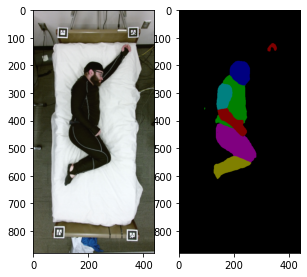

In [27]:
import matplotlib.pyplot as plt
import cv2

fig = plt.figure(figsize=(10, 10))

img = cv2.imread("/content/drive/MyDrive/Self-Correction-Human-Parsing/input/dataset/167.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(141) 
plt.imshow(img)

img1 = cv2.imread("/content/drive/MyDrive/Self-Correction-Human-Parsing/segment_output/167.png")
plt.subplot(142) 
plt.imshow(img1)

In [26]:
!python train.py --data-dir '/content/drive/MyDrive/Self-Correction-Human-Parsing/datasets/dataset'  --batch-size 3 --imagenet-pretrain '/content/drive/MyDrive/Self-Correction-Human-Parsing/weight/pretrain/pretrainrcrhzmamtmp' --num-classes 7 --epoch 10

wandb: Currently logged in as: zeinabmostafavi (use `wandb login --relogin` to force relogin)
wandb: Tracking run with wandb version 0.12.11
wandb: Run data is saved locally in /content/drive/.shortcut-targets-by-id/191Z1juE31YmSC1Ank_Z9ILJFZ26MttFV/Self-Correction-Human-Parsing/wandb/run-20220314_175836-fvr3futw
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run berry-cobbler-5
wandb: ⭐️ View project at https://wandb.ai/zeinabmostafavi/Human-Parsing-on-Binary-Images
wandb: 🚀 View run at https://wandb.ai/zeinabmostafavi/Human-Parsing-on-Binary-Images/runs/fvr3futw
Namespace(arch='resnet101', batch_size=3, cycle_epochs=10, data_dir='/content/drive/MyDrive/Self-Correction-Human-Parsing/datasets/dataset', epochs=10, eval_epochs=10, gpu='0,1,2', ignore_label=255, imagenet_pretrain='/content/drive/MyDrive/Self-Correction-Human-Parsing/weight/pretrain/pretrainrcrhzmamtmp', input_size='473,473', lambda_c=0.1, lambda_e=1, lambda_s=1, learning_rate=0.007, log_dir='./log', model_